# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>

This is important because recognizing emotion helps artiicial intelligence make informed decisions about how to interact with users. This will help machine learning models better interact with users. For example, solving facial emotion detection can help mitigate threats by identifing if someone is becoming upset prior to the situation escalating. Facial emotion detection can be used in marketing to identify what people are reacting to and how are they reacting. Facial emotion detection would also aid in nonverbal communication especially in emergency situatiions.

**The objectives:** What is the intended goal?<br>

The intended goal is to train a model to accurately identify the facial expressions and other non-verbal cues.However the overall goal is to develop systems that can automatically identify and interpret human emotions based on facial expressions, allowing machines to understand and respond to a person's emotional state.

**The key questions:** What are the key questions that need to be answered?<br>

*   How does variations in lighting or color of the images affect the model's accuracy?
*   What level of detail is needed for accurate detection?(For example does the model need to identify micro expression)
*   How large and/or diverse does the dataset need to be?
*   What are the ethical requirements? (i.e. How to prevent misuse of the model)
*   How to mitigate biases?

**The problem formulation:** What are we trying to solve using data science?

The task of Facial Emotion Detection involves the development of a machine learning model capable of accurately identifying and classifying human emotions from facial expressions in images. Despite significant progress in computer vision and deep learning, challenges remain in achieving high accuracy, robustness, and generalization across various real-world conditions such as different lighting, facial orientations, and cultural variations in emotional expression. This problem is critical in areas like human-computer interaction, mental health monitoring, customer service, and entertainment.

The objective of this project is to train a model that can accurately detect and classify emotions (e.g., happiness, sadness, surprise, neutral) from facial images with high accuracy and efficiency. The system should be robust to variations in lighting, pose, and color.
## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
from PIL import Image
from collections import defaultdict

# For Data Visualization
import seaborn as sns

from sklearn import preprocessing

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam,SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
# Store the path of the data file from the Google drive
path = '/content/drive/MyDrive/Great Learning Data Science Class/Great Learning Data Science Class/Facial_emotion_images.zip'

# Extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()



In [4]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

**Observations and Insights:__**
Unique Features:
Slightly elevated eyebrows, smiling mouth, cheeks raised, eyes slightly squinted,
wrinkles at the otheer corner of the eyes

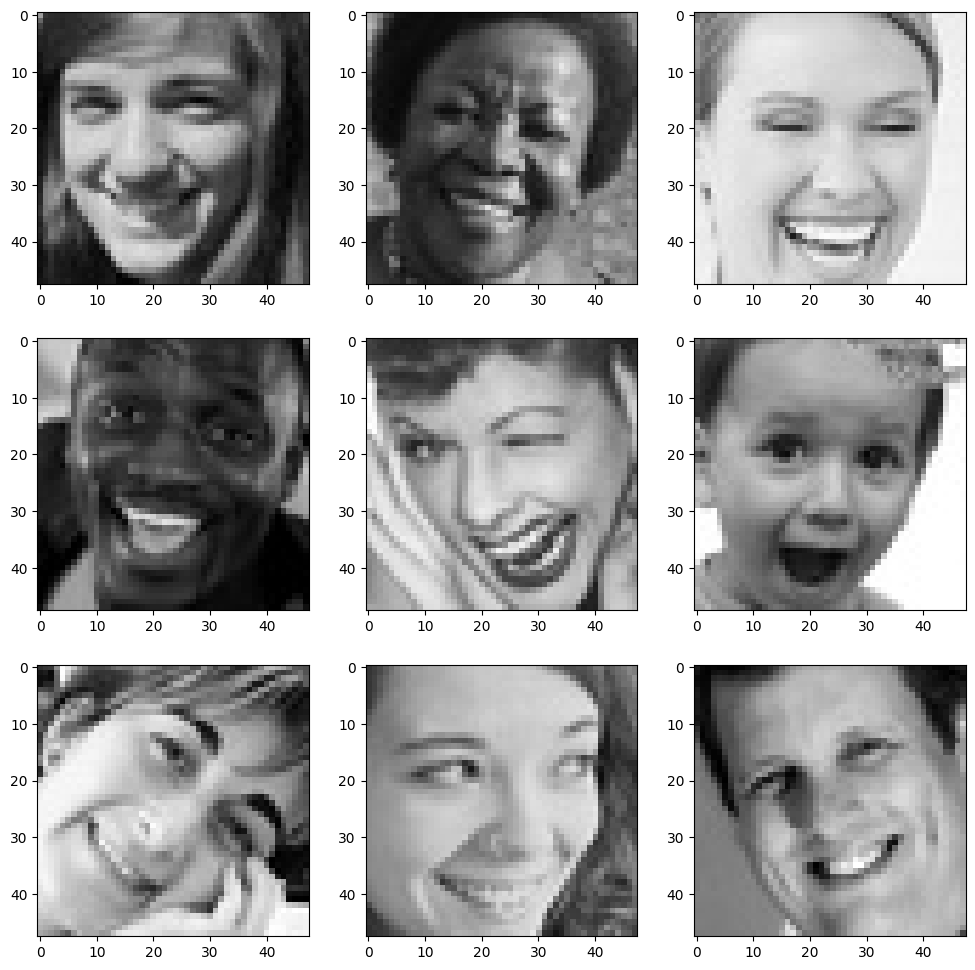

In [31]:
# Visualizing happy emotion
emotion = 'happy'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion + "/" +
                  os.listdir(folder_path + "train/" + emotion)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()



### **Sad**

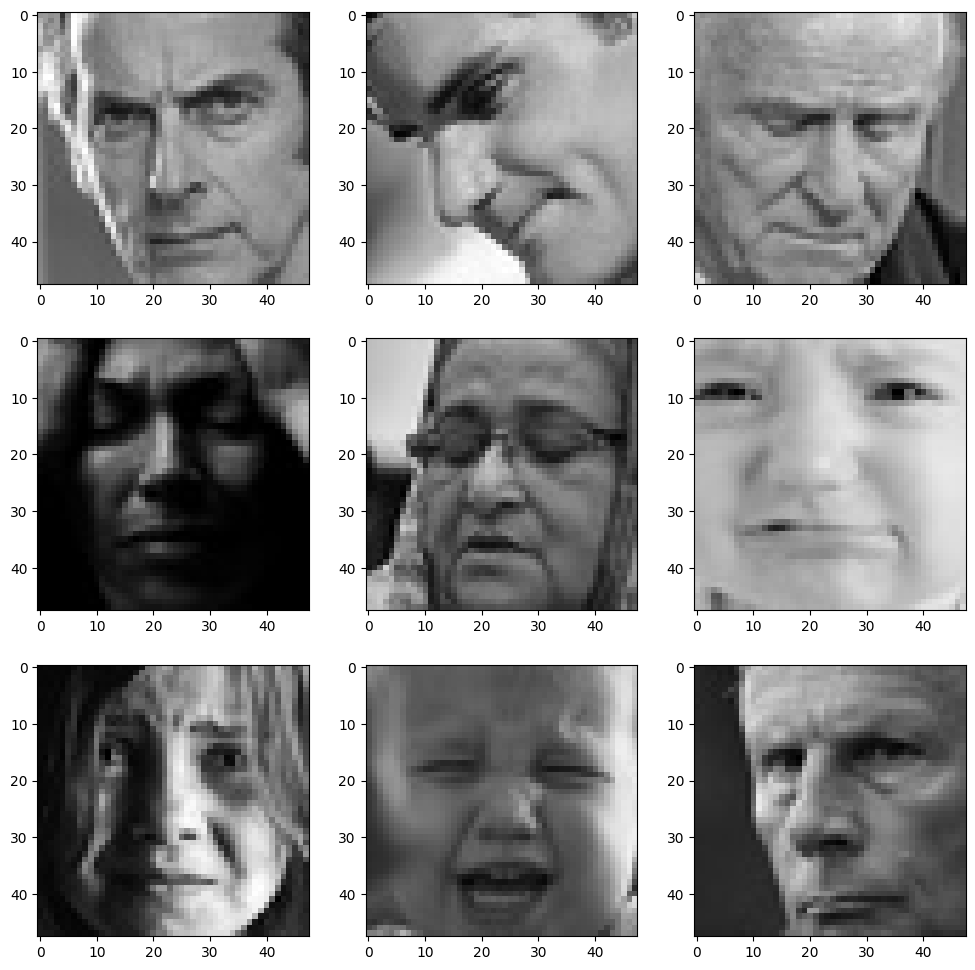

In [32]:
# Visualizing sad emotion
emotion = 'sad'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion + "/" +
                  os.listdir(folder_path + "train/" + emotion)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()


**Observations and Insights:__**Unique Features of Sad Facial Expression: downturn lips, furrowed eyebrows and forehead, drooping eyelids, chin pulled up

### **Neutral**

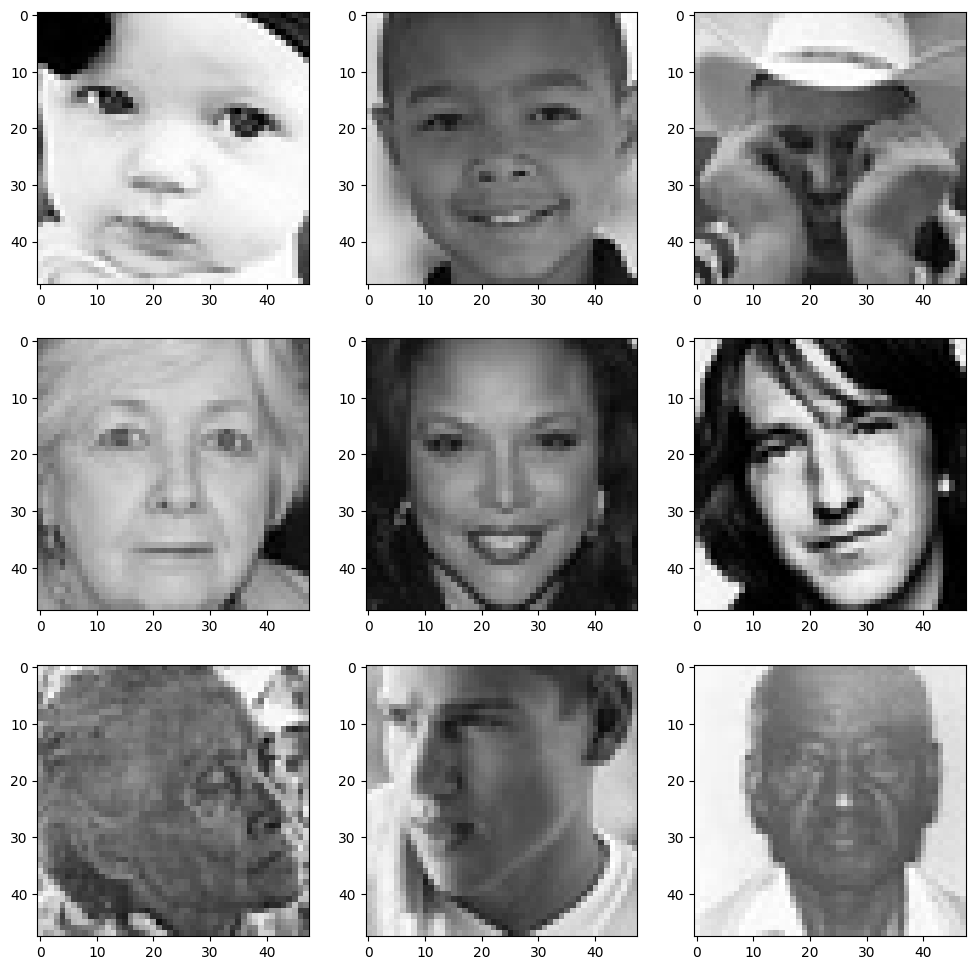

In [33]:
# Visualizing neutral emotion
emotion = 'neutral'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion + "/" +
                  os.listdir(folder_path + "train/" + emotion)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__** Unique Feature of Neutral facial Expression Lips in a straight line, eyebrows horizontal, face relaxed

### **Surprised**

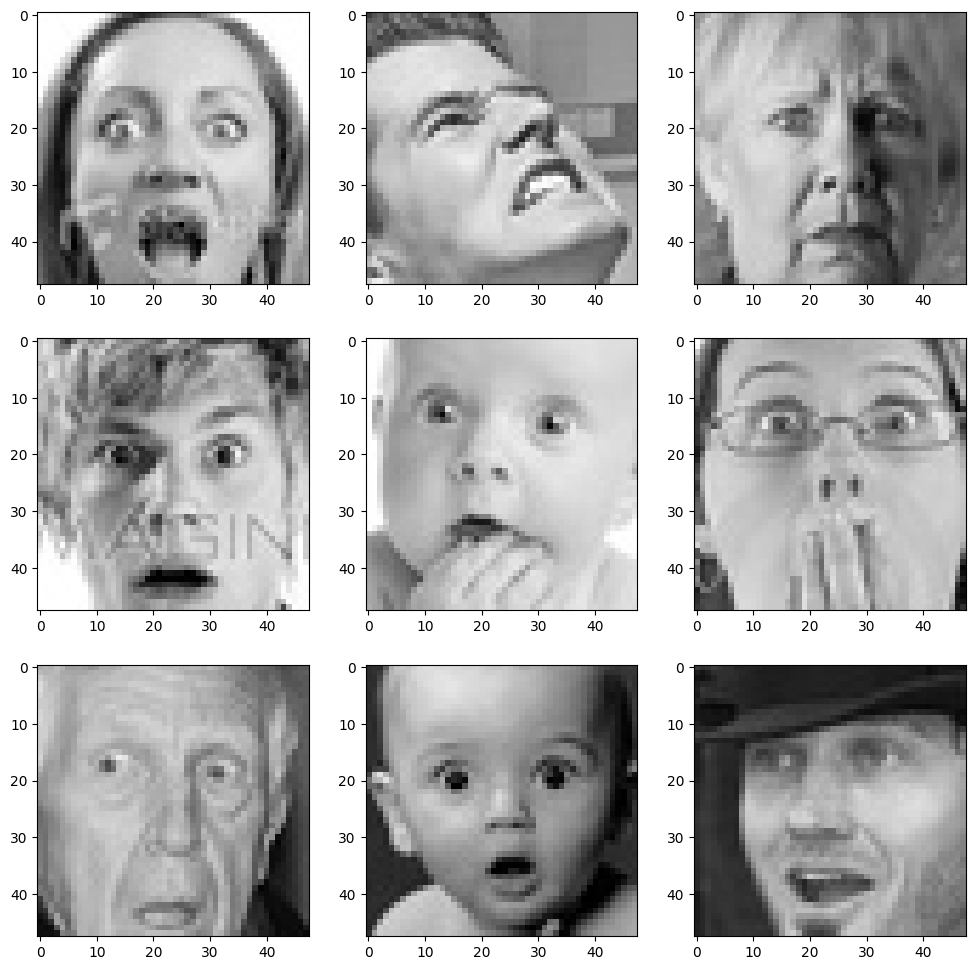

In [34]:
# Visualizing surprise emotion
emotion = 'surprise'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion + "/" +
                  os.listdir(folder_path + "train/" + emotion)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__** Unique Feature of Surprise Facial Expression:Mouth slightly open, eyebrows arched, eyes wide.

## **Checking Distribution of Classes**

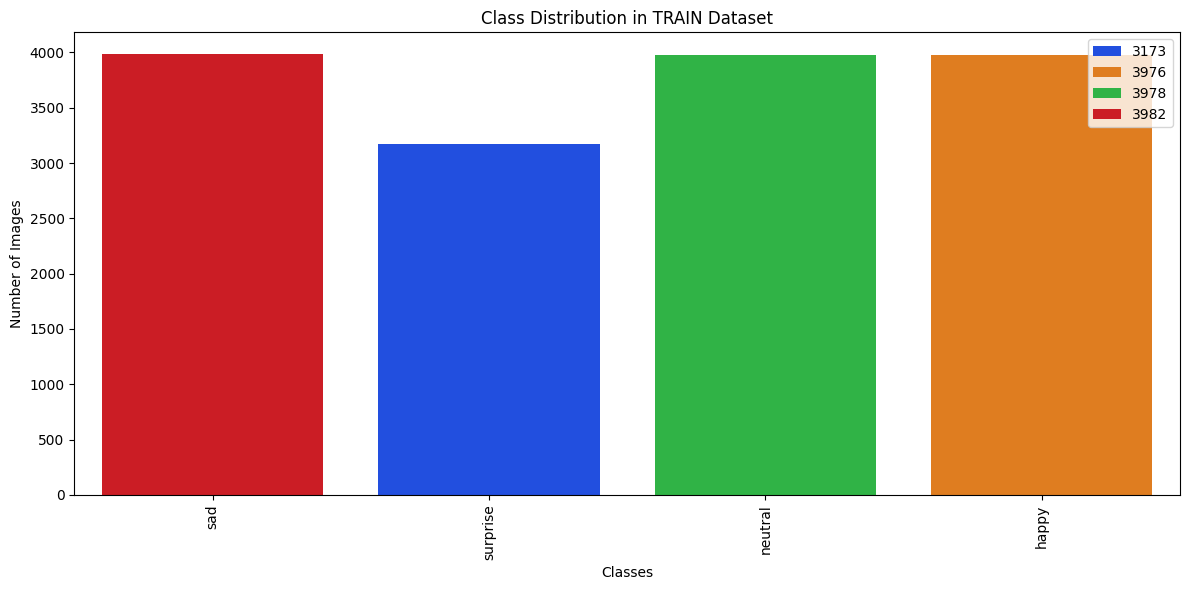

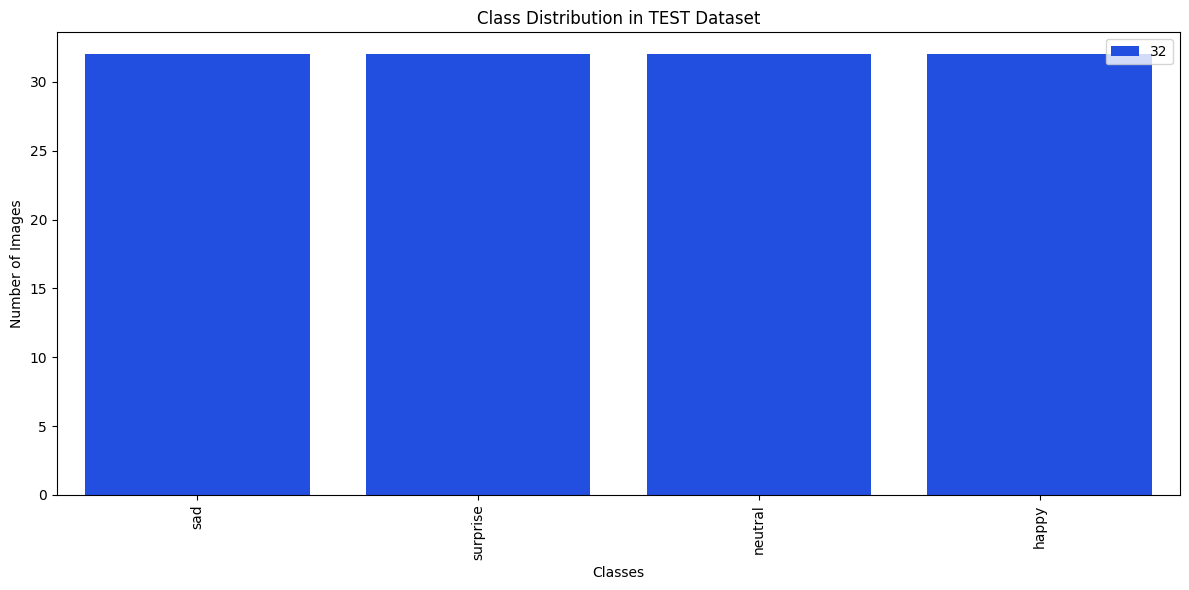

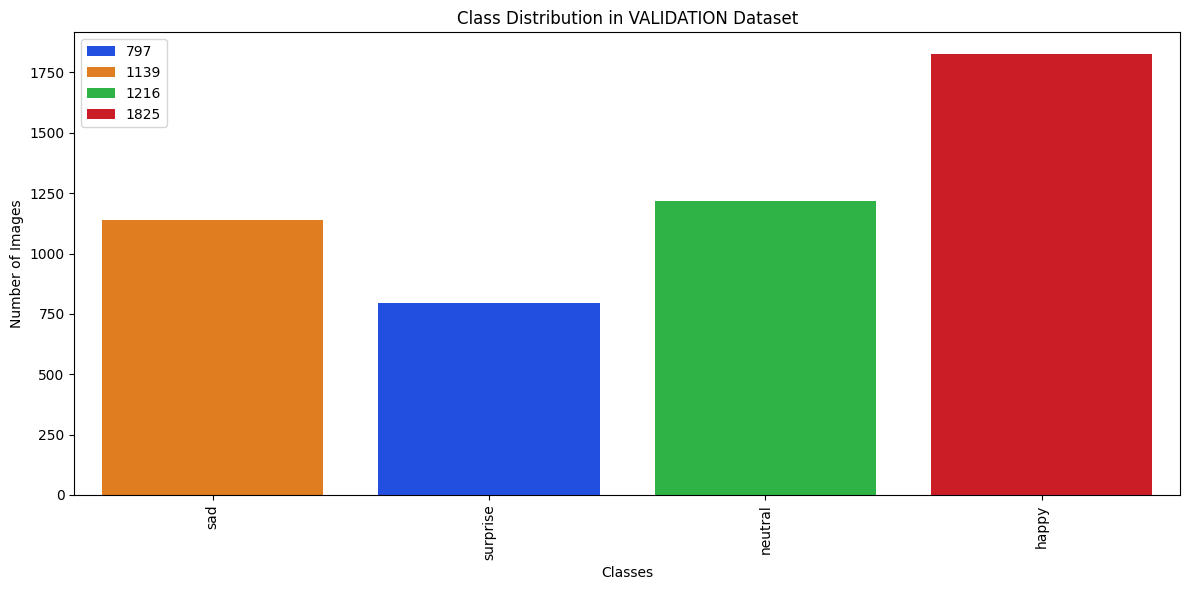

In [5]:
def analyze_class_distribution(directory):
    """
    Analyze class distribution across train, test, and validation folders

    Args:
        base_directory (str): Path to root directory containing dataset

    Returns:
        dict: Distribution of classes in each dataset split
    """
    distribution = defaultdict(lambda: defaultdict(int))

    # Possible dataset
    dataset = ['train', 'test', 'validation']

    for classes in dataset:
        path = os.path.join(directory, classes)

        # Check if  directory exists
        if not os.path.exists(path):
            continue

        # Count classes in this dataset
        for class_name in os.listdir(path):
            class_path = os.path.join(path, class_name)

            # Ensure it's a directory
            if os.path.isdir(class_path):
                num_images = len([f for f in os.listdir(class_path)
                                  if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))])
                distribution[classes][class_name] = num_images

    return dict(distribution)

def print_distribution(distribution):

    for split, classes in distribution.items():
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(classes.keys()), y=list(classes.values()), hue= classes.values(), palette='bright')
        plt.title(f'Class Distribution in {split.upper()} Dataset')
        plt.xlabel('Classes')
        plt.ylabel('Number of Images')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

dist = analyze_class_distribution(folder_path)
print_distribution(dist)

**Observations and Insights:__**Classes are evenly distributed in test data, fairly evenly distributed in the training data amd the happy class more than double the surprise data in the validation set

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [6]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [7]:
# Data loaders are created for the train, validation and test data
batch_size  = 128

datagen_train  = ImageDataGenerator(rescale=1./255) #Normalize Images
datagen_val = ImageDataGenerator(rescale=1./255) #Normalize Images
datagen_test = ImageDataGenerator(rescale=1./255) #Normalize Images

#The data loaders take the images from their respective folders

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [ ]:
#Build CNN Model
cnn_model = Sequential()

# First Convolutional Block
cnn_model.add(Conv2D(32, (3, 3), activation= 'relu', input_shape = (picture_size, picture_size, 1), padding = 'same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

# Second Convolutional Block
cnn_model.add(Conv2D(64, (3, 3), activation= 'relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

# Third Convolutional Block
cnn_model.add(Conv2D(128, (3, 3), activation= 'relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.25))

# Flatten and Dense Layers
cnn_model.add(Flatten())
cnn_model.add(Dense(256))
cnn_model.add(LeakyReLU(0.1))

# Output Layer
cnn_model.add(Dense(4, activation = 'softmax'))


### **Compiling and Training the Model**

In [ ]:
# Compile the model
optimizer = Adam(learning_rate =0.001)
cnn_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

# Fitting the model
history = cnn_model.fit(train_set, validation_data = validation_set, epochs = 20)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 22, 22, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 9, 9, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 619,140 (2.36 MB)

 Trainable params: 618,692 (2.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.7523 - loss: 0.6235 - val_accuracy: 0.6958 - val_loss: 0.8175
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.7700 - loss: 0.5685 - val_accuracy: 0.7157 - val_loss: 0.7675
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7786 - loss: 0.5491 - val_accuracy: 0.6982 - val_loss: 0.8410
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8111 - loss: 0.4733 - val_accuracy: 0.7000 - val_loss: 0.8275
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.8163 - loss: 0.4565 - val_accuracy: 0.7141 - val_loss: 0.8148
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.8330 - loss: 0.4190 - val_accuracy: 0.7284 - val_loss: 0.7815
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.8272 - loss: 0.4398 - val_accuracy: 0.7034 - val_loss: 0.8837
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8536 - loss: 0.3770 - val_

### **Evaluating the Model on the Test Set**

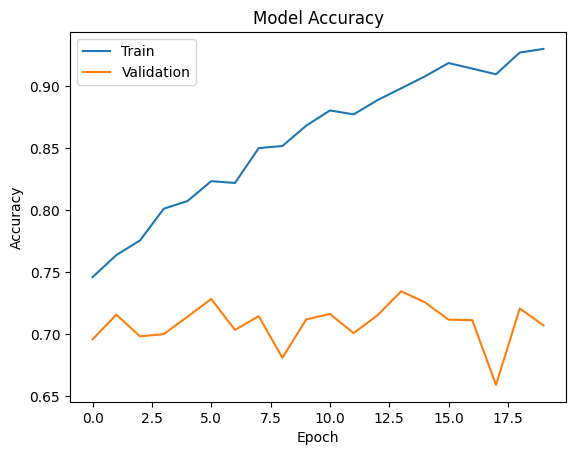

1/1 - 0s - 62ms/step - accuracy: 0.7188 - loss: 0.9475
Test Accuracy: 71.88%


In [ ]:
#Plot Model Acccuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

accuracy = cnn_model.evaluate(test_set, verbose=2)
print(f"Test Accuracy: {accuracy[1]*100:.2f}%")

**Observations and Insights:__**The test accuracy is 71.88%.

While the model accuracy is good. There is room for improvement. Additional models wil be trained in order to achieve 80+% accuracy.

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# Creating sequential model
cnn_model2 = Sequential()

# First Convolutional Block
cnn_model2.add(Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape=(48, 48, 1)))
cnn_model2.add(BatchNormalization())
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Dropout(0.2))

# Second Convolutional Block
cnn_model2.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
cnn_model2.add(BatchNormalization())
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Dropout(0.25))

# Third Convolutional Block
cnn_model2.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
cnn_model2.add(BatchNormalization())
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Dropout(0.3))

# Fourth Convolutional Block
cnn_model2.add(Conv2D(256, (3,3), padding = "same", activation = "relu"))
cnn_model2.add(BatchNormalization())
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Dropout(0.35))

# Fully Connected Layers
cnn_model2.add(Flatten())
cnn_model2.add(Dense(512, activation = "relu"))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Dropout(0.5))
cnn_model2.add(Dense(256, activation="relu"))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Dropout(0.4))

# Output Layer
cnn_model2.add(Dense(4, activation = "softmax"))


### **Compiling and Training the Model**

In [ ]:
#Create and Compile Model
optimizer = Adam(learning_rate =0.0001)
cnn_model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn_model2.summary()

# Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

history1 = cnn_model2.fit(train_set, validation_data = validation_set, epochs = 30,  callbacks=[reduce_lr, early_stop,])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,574,020 (6.00 MB)

 Trainable params: 1,572,036 (6.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 130ms/step - accuracy: 0.2915 - loss: 2.2400 - val_accuracy: 0.3667 - val_loss: 1.5065 - learning_rate: 1.0000e-04
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.3208 - loss: 2.0275 - val_accuracy: 0.3667 - val_loss: 1.8901 - learning_rate: 1.0000e-04
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.3427 - loss: 1.8842 - val_accuracy: 0.3669 - val_loss: 1.7773 - learning_rate: 1.0000e-04
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.3590 - loss: 1.7866 - val_accuracy: 0.3719 - val_loss: 1.7328 - learning_rate: 1.0000e-04
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.3649 - loss: 1.7096 - val_accuracy: 0.3904 - val_loss: 1.5917 - learning_rate: 2.0000e-05
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.3685 - loss: 1.6953 - val_accuracy: 0.4324 - val_loss: 1.4216 - learning_rate: 2.0000e-05
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - 

### **Evaluating the Model on the Test Set**

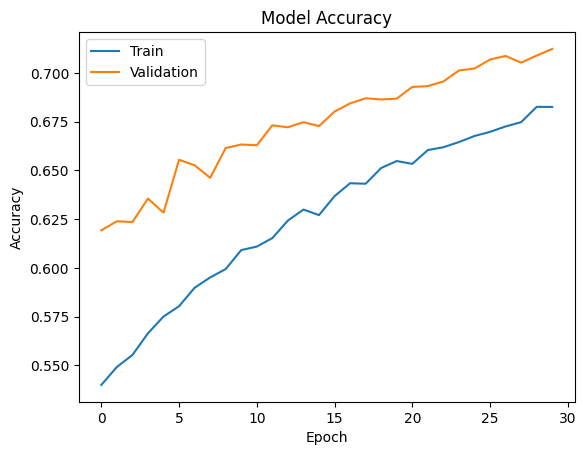

1/1 - 0s - 134ms/step - accuracy: 0.7031 - loss: 0.7043
Test Accuracy: 70.31%


In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

accuracy = cnn_model2.evaluate(test_set, verbose=2)
print(f"Test Accuracy: {accuracy[1]*100:.2f}%")

\**Observations and Insights:__**The training accuracy is 70.31%. The accuracy of the second CNN model decrease despite the increase complexity. This may due to data being underfitted.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [8]:
# Color image is set to RGB and iamge size 224 which is standard for VGG16 Model, ResNEtV2 model and EfficientNet model
picture_size2 = 224
datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=lambda x: tf.image.resize(x, [224, 224])
)
train_set2 = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size2, picture_size2),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

validation_set2 = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size2, picture_size2),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

test_set2 = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size2, picture_size2),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [10]:
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (picture_size2, picture_size2, 3))
vgg.summary()

transfer_layer = vgg.get_layer('block5_pool')

# Freeze base model layers
vgg.trainable = False

# Add classification layers on top of it

x = Flatten()(transfer_layer.output) # Flatten the output from the 3rd block of the VGG16 model
x = Dense(512, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

pred = Dense(4, activation = 'softmax')(x)

vgg_model = Model(vgg.input, pred) # Create the model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### **Compiling and Training the VGG16 Model**

In [11]:
#Define Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.000001,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
# Compiling the model
vgg_model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
              metrics = ['accuracy'])

In [12]:
history3 = vgg_model.fit(train_set2,
                     validation_data = validation_set2,
                     epochs = 20,
                     steps_per_epoch=train_set2.batch_size,
                     validation_steps= validation_set2.batch_size, callbacks=[reduce_lr, early_stop])

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 45s 241ms/step - accuracy: 0.4803 - loss: 1.5684 - val_accuracy: 0.5220 - val_loss: 1.4620 - learning_rate: 0.0010
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.6047 - loss: 1.0740 - val_accuracy: 0.6500 - val_loss: 0.8536 - learning_rate: 0.0010
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - accuracy: 0.6307 - loss: 0.9730 - val_accuracy: 0.6835 - val_loss: 0.7905 - learning_rate: 0.0010
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.6729 - loss: 0.8394 - val_accuracy: 0.6817 - val_loss: 0.8187 - learning_rate: 0.0010
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.6955 - loss: 0.7732 - val_accuracy: 0.6940 - val_loss: 0.7751 - learning_rate: 0.0010
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.7144 - loss: 0.7403 - val_accuracy: 0.6910 - val_loss: 0.7731 - learning_rate: 0.0010
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 161ms/step - accuracy: 0.7

### **Evaluating the VGG16 model**

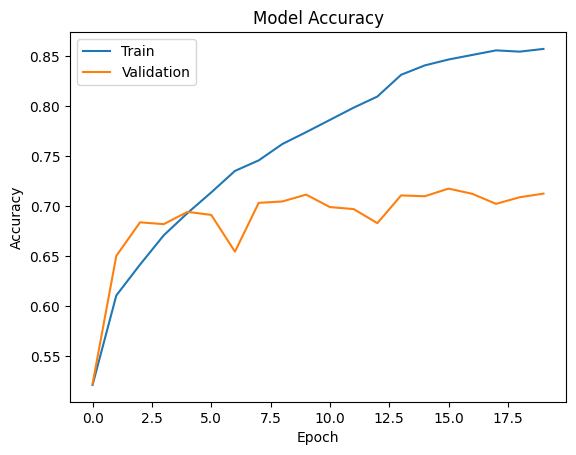

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step

Test Accuracy: 21.88%

Classification Report:
              precision    recall  f1-score   support

       happy       0.12      0.12      0.12        32
         sad       0.31      0.25      0.28        32
     neutral       0.24      0.31      0.27        32
    surprise       0.22      0.19      0.20        32

    accuracy                           0.22       128
   macro avg       0.22      0.22      0.22       128
weighted avg       0.22      0.22      0.22       128


Confusion Matrix:
[[ 4  7 12  9]
 [ 8  8  8  8]
 [12  6 10  4]
 [ 9  5 12  6]]


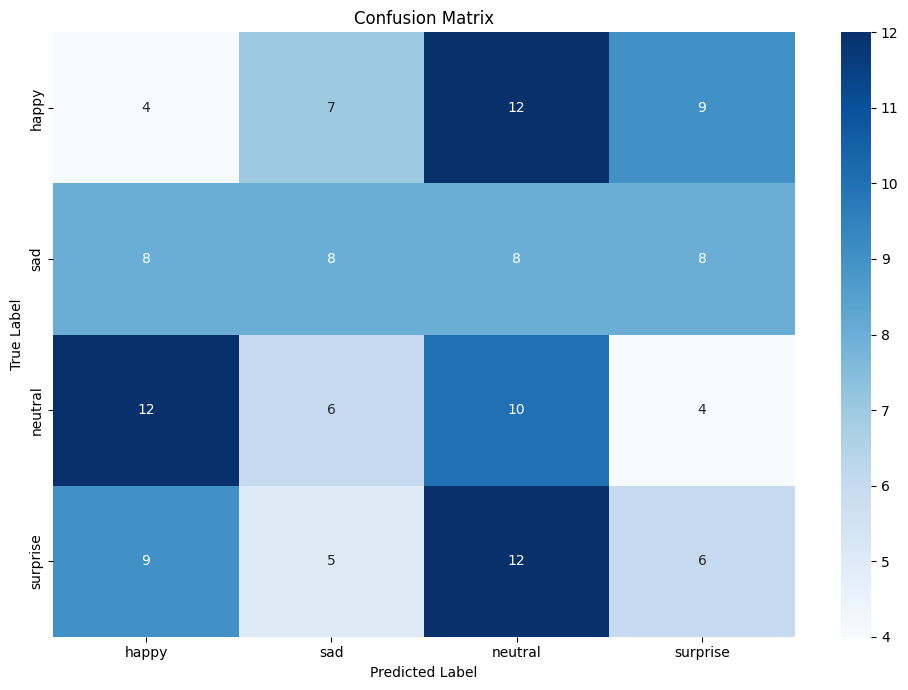

In [13]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

predictions = vgg_model.predict(test_set2)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_set2.classes

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(
    true_classes,
    predicted_classes,
    target_names=test_set2.class_indices.keys()
))

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

# Visualization of Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=test_set2.class_indices.keys(),
            yticklabels=test_set2.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__** Vgg Model has 21.88% test accuracy. Which is significantly less than the previous models

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [14]:
# Load ResNet50V2 with correct input shape
res_net_v2_model = ResNet50V2(
    weights='imagenet',        # Use pre-trained ImageNet weights
    include_top=False,         # Remove the top classification layer
    input_shape=(224, 224, 3)    #image dimensions
)

# Freeze base model layers
res_net_v2_model.trainable = False

# Add classification layers
x = res_net_v2_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Add dropout for regularization

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  # Add dropout for regularization
pred = Dense(4, activation='softmax')(x)

# Create the final model
model4 = Model(res_net_v2_model.input, pred)



94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


### **Compiling and Training the Model**

In [20]:
# Compile the model
model4.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Reduce Learning Rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
    )

# Early Stopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
    )

# Train the model
history4 = model4.fit(
    train_set2,
    epochs=20,
    validation_data=validation_set2,
    steps_per_epoch=train_set2.batch_size,
    validation_steps=validation_set2.batch_size,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 50s 273ms/step - accuracy: 0.5433 - loss: 1.4018 - val_accuracy: 0.6930 - val_loss: 0.9038 - learning_rate: 1.0000e-04
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - accuracy: 0.7268 - loss: 0.7298 - val_accuracy: 0.7034 - val_loss: 0.8058 - learning_rate: 1.0000e-04
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - accuracy: 0.7951 - loss: 0.5538 - val_accuracy: 0.7157 - val_loss: 0.8176 - learning_rate: 1.0000e-04
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - accuracy: 0.8437 - loss: 0.4179 - val_accuracy: 0.7239 - val_loss: 0.7759 - learning_rate: 1.0000e-04
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.8870 - loss: 0.3044 - val_accuracy: 0.7143 - val_loss: 0.8315 - learning_rate: 1.0000e-04
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.9116 - loss: 0.2543 - val_accuracy: 0.7179 - val_loss: 0.8516 - learning_rate: 1.0000e-04
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 16

### **Evaluating the ResNet Model**

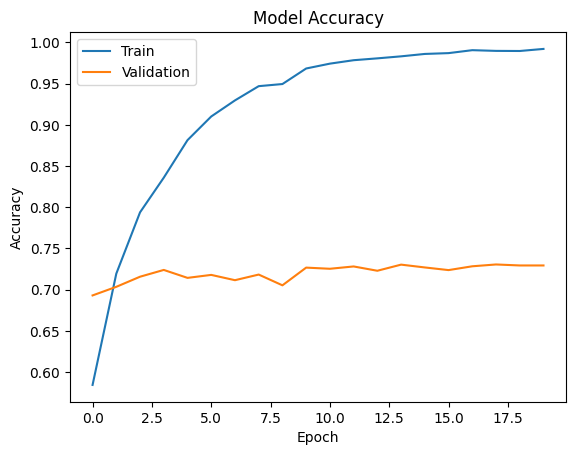

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

Test Accuracy: 25.78%

Classification Report:
              precision    recall  f1-score   support

       happy       0.24      0.25      0.25        32
         sad       0.31      0.25      0.28        32
     neutral       0.24      0.31      0.27        32
    surprise       0.26      0.22      0.24        32

    accuracy                           0.26       128
   macro avg       0.26      0.26      0.26       128
weighted avg       0.26      0.26      0.26       128


Confusion Matrix:
[[ 8  8  9  7]
 [ 8  8  8  8]
 [10  7 10  5]
 [ 7  3 15  7]]


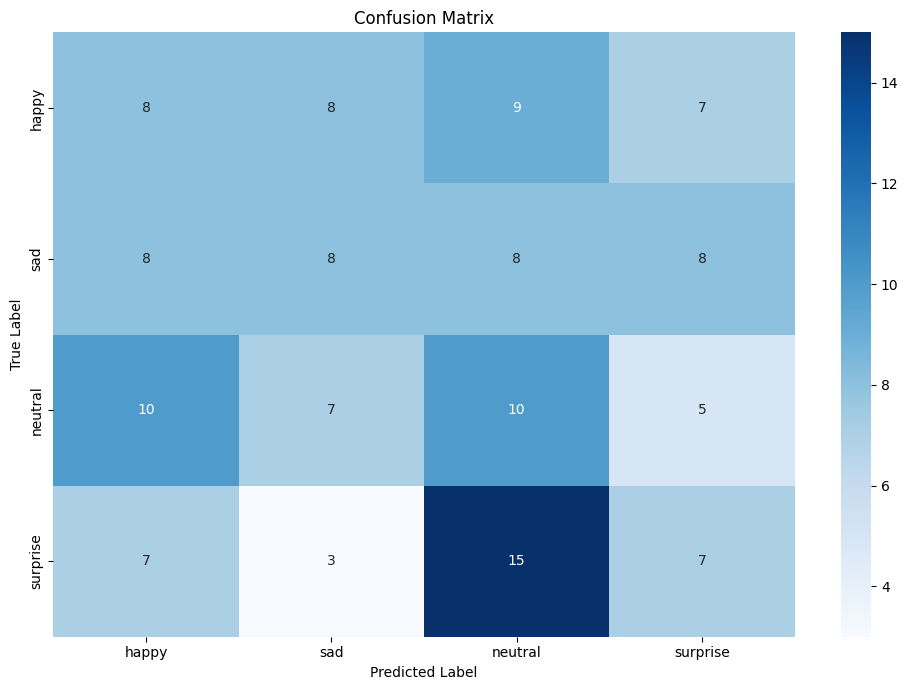

In [30]:
#Plot Model Acccuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

predictions = res_net_v2_model.predict(test_set2)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = test_set2.labels

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_classes)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(
    true_labels,
    predicted_classes,
    target_names=test_set2.class_indices.keys()
))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

# Visualization of Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=test_set2.class_indices.keys(),
            yticklabels=test_set2.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



**Observations and Insights:__** ResNet Model only has a 23.44% accuracy. This is slightly better than the VGG Model. However still significatly worse than the CNN models

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [24]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
eff_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(224,224,3)
    )

    # Freeze layers
eff_model.trainable = False

    # Add classification layers
x = eff_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
pred = Dense(4, activation='softmax')(x)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [25]:
# Create final model
model5 = Model(eff_model.input, pred)

### **Compiling and Training the Model**

In [26]:
# Compile the model
model5.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
history5 = model5.fit(
    train_set2,
    epochs=20,
    validation_data=validation_set2,
    steps_per_epoch=train_set2.batch_size,
    validation_steps=validation_set2.batch_size
)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 72s 371ms/step - accuracy: 0.2480 - loss: 2.4776 - val_accuracy: 0.3667 - val_loss: 1.3754
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - accuracy: 0.2553 - loss: 1.4712 - val_accuracy: 0.3667 - val_loss: 1.3537
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.2560 - loss: 1.4627 - val_accuracy: 0.2443 - val_loss: 1.3852
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.2542 - loss: 1.4384 - val_accuracy: 0.3667 - val_loss: 1.4027
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - accuracy: 0.2617 - loss: 1.4771 - val_accuracy: 0.1601 - val_loss: 1.5104
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.2577 - loss: 1.4587 - val_accuracy: 0.2443 - val_loss: 1.3770
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - accuracy: 0.2577 - loss: 1.4402 - val_accuracy: 0.3667 - val_loss: 1.3786
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.2512 - loss: 1

### **Evaluating the EfficientnetNet Model**

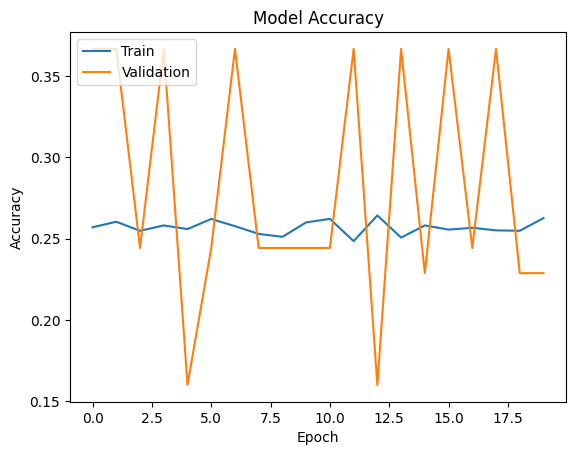

In [44]:
#Plot Model Acccuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



**Observations and Insights:__** EfficientnetNet Model had a 36.67% accuracy

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [35]:
train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [36]:
# Creating sequential model
cnn_model3 = Sequential()

# First Convolutional Block
cnn_model3.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", input_shape=(48, 48, 1)))
cnn_model3.add(MaxPooling2D(pool_size = 2))
cnn_model3.add(BatchNormalization())

# Second Convolutional Block
cnn_model3.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
cnn_model3.add(MaxPooling2D(pool_size = 2))
cnn_model3.add(BatchNormalization())

# Third Convolutional Block
cnn_model3.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"))
cnn_model3.add(MaxPooling2D(pool_size = 2))
cnn_model3.add(Dropout(0.2))

# Fourth Convolutional Block
cnn_model3.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
cnn_model3.add(MaxPooling2D(pool_size = 2))
cnn_model3.add(Dropout(0.2))

# Fifth Convolutional Block
cnn_model3.add(Conv2D(filters = 512, kernel_size = 3, padding = "same", activation = "relu"))
cnn_model3.add(MaxPooling2D(pool_size = 2))
cnn_model3.add(Dropout(0.2))

# Fully Connected Layers
cnn_model3.add(Flatten())
cnn_model3.add(Dense(1024, activation = "relu"))
cnn_model3.add(Dropout(0.4))

# Classifier
cnn_model3.add(Dense(4, activation = "softmax")) # 4 represents output layer neurons
optimizer = Adam(learning_rate =0.001)

### **Compiling and Training the Model**

In [37]:
cnn_model3.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn_model3.summary()

history6 = cnn_model3.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    steps_per_epoch=train_set.batch_size,
    validation_steps=validation_set.batch_size
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,097,796 (8.00 MB)

 Trainable params: 2,097,604 (8.00 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.3072 - loss: 1.5002 - val_accuracy: 0.3667 - val_loss: 1.3498
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4340 - loss: 1.2170 - val_accuracy: 0.3657 - val_loss: 1.3703
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.5637 - loss: 1.0037 - val_accuracy: 0.3339 - val_loss: 1.4416
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.6217 - loss: 0.8854 - val_accuracy: 0.4750 - val_loss: 1.2590
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6457 - loss: 0.8282 - val_accuracy: 0.6399 - val_loss: 0.8646
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.6709 - loss: 0.7715 - val_accuracy: 0.6064 - val_loss: 0.9423
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6884 - loss: 0.7433 - val_accuracy: 0.6946 - val_loss: 0.7633
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.7062 - loss: 0.7044 - val_acc

### **Evaluating the Model on Test Set**

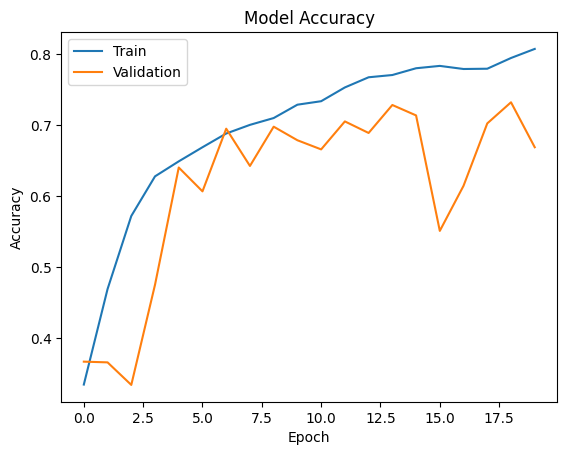

4/4 - 0s - 7ms/step - accuracy: 0.7109 - loss: 0.6859


In [39]:
#Plot Model Acccuracy
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

test_images, test_labels = next(test_set)
accuracy =cnn_model3.evaluate(test_images, test_labels, verbose = 2)

**Observations and Insights:__** This model has a 74% accuracy.

### **Plotting the Confusion Matrix for the chosen final model**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


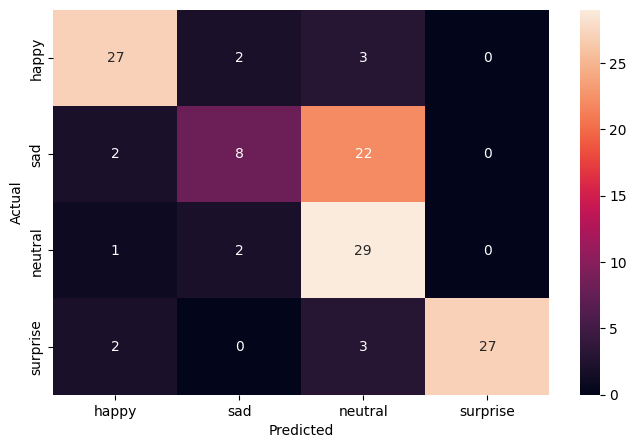

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = cnn_model3.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:__**

## **Conclusion:____________** The CNN Model performed the best. This is due to the use of grayscale. This reduces irrelevant details such as lighting and color. Reducing the complexity of the model. The most inaccuracy occur with the neutral expression being confused for sadness. **Recommendation**: Increase the number of neutral expression in the training data set.

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?


*   Grayscale reduces the complexity of the model by reducing or eliminating irrelevant details such as lighting and color.
*   Larger image size lead to:
        Increased computational complexity, making the model more difficult to train effectively.

        High Variability: Larger images may contain much more variability and noise, which could confuse the model if the training dataset isn’t diverse enough.

        Training instability caused by large gradients or slow convergence.

*   Training Accuracy plateaus around 70%
*   The most inaccuracy occur with the neutral expression being confused for sadness.





### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

The models that were run with color mode ‘grayscale’ performed significantly better that models(VGG, ResNet V2, EfficientNet) trained with color mode ‘rgb'


### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

A Convolutional Neural Network Model provides the best performance.

- Least complex of the models

- Easier to fine tune

- Can be trained on smaller image sizes
